In [ ]:
#################################################################
#                                                               #
#  CS435 Generative AI: Security, Ethics and Governance         #
#                                                               #
#  Instructor: Dr. Adnan Masood                                 #
#  Contact:    adnanmasood@gmail.com                            #
#                                                               #
#  Notebook is MIT Licensed                                     #
#################################################################


# Long Short-Term Memory (LSTM) Networks

Welcome to our session on **Long Short-Term Memory (LSTM)** networks!

In this Jupyter notebook, we will explore LSTMs at **five different levels** of explanation (from simpler to advanced), while providing code samples, equations, examples, and exercises. This notebook is structured so you can **run each code cell** and see how it works for yourself.

## Building an Intuitive Understanding

We will then cover:
- **Intuition behind the technology**
- **History and invention of LSTM**
- **Illustrative examples with code**
- **Example calculations** (weights, biases, gates)
- **Step-by-step example from scratch**
- **Illustrative problem** LSTMs solve
- **Real-world problem** LSTMs solve
- **Questions to ponder**
- **Answers** with code examples
- **TODO code sample** with hints
- **Glossary** of important terms


Imagine you have a special notepad that can remember important things and forget unimportant things. That’s what an **LSTM** (Long Short-Term Memory) is for a computer.

- A normal computer tries to remember everything, but that can be overwhelming.
- An LSTM decides what to keep, what to throw away, and what to use right now.

This helps when you want a machine to learn from things that happen in a sequence—like **words in a sentence**, **notes in a song**, or **data points in a time series**. The LSTM is good at handling important memories from the past, while forgetting stuff that’s not important.

### Intuition Behind LSTM
Think of an LSTM as a **smart filter** for remembering and forgetting information:
1. It looks at new information.
2. It looks at what it already knows.
3. It decides **“Should I remember this new piece of information or forget it?”**
4. It also decides **“How much of the old memory should I keep?”**

LSTMs are used for all sorts of tasks involving sequences:
- **Text generation** (Predicting the next word)
- **Sentiment analysis** (Reading a tweet or sentence and deciding if it’s positive or negative)
- **Time series forecasting** (Predicting stock prices or weather based on past data)
- **Speech recognition** (Understanding spoken words)

### A Brief History
- **1997**: LSTM was introduced by **Sepp Hochreiter and Jürgen Schmidhuber**.
- It was invented because older models, known as **RNNs (Recurrent Neural Networks)**, had trouble remembering information for more than a few steps (known as the **vanishing gradient** problem).
- LSTMs added a clever architecture to fix that problem by using **gates** to manage information.


### Underlying Technology (How LSTM Works)
An LSTM is a special type of Recurrent Neural Network (RNN) cell. In a regular RNN, we have:
```
h_t = tanh(W_h * [h_{t-1}, x_t] + b_h)
```
Where:
- **h_t** is the hidden state at time step **t**.
- **x_t** is the input at time step **t**.
- **W_h** and **b_h** are parameters (weights and biases).

But in an LSTM cell, we introduce something called the **cell state**, denoted as **C_t**. The cell state is like a conveyor belt that can carry information from the past to the future. The LSTM can add or remove information from the cell state using **gates**.

### Three Main Gates in an LSTM
1. **Forget Gate ($f_t$)**: Decides what information to **forget** from the cell state.
2. **Input Gate ($i_t$)**: Decides what new information to store in the cell state.
3. **Output Gate ($o_t$)**: Decides what information from the cell state we will **output** at this time step.

Additionally, there's a candidate cell state update $\tilde{C}_t$ which is proposed new information to add into the cell.

So at each time step **t**:

1. We read the input **x_t** and previous hidden state **h_{t-1}**.
2. We compute the **forget gate**: how much of the previous cell state **C_{t-1}** do we keep?
3. We compute the **input gate**: how much new information (candidate) do we add?
4. We update the cell state **C_t**.
5. We compute the **output gate**: how much of the new cell state do we reveal as the new hidden state **h_t**?


### Mathematical Details of LSTM

Below are the key LSTM equations. Each gate is a function of the current input $x_t$ and the previous hidden state $h_{t-1}$. We typically group them together as $[h_{t-1}, x_t]$ when we multiply by the respective weight matrices.

1. **Forget Gate**: $f_t$
$$
f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
$$
Here, $f_t$ ranges between 0 and 1, indicating how much of the old cell state you keep.

2. **Input Gate**: $i_t$
$$
i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
$$
This gate controls how much new information gets stored in the cell state.

3. **Candidate Cell State**: $\tilde{C}_t$
$$
\tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)
$$
This is the new information (candidate) that could be added to the cell state.

4. **New Cell State**: $C_t$
$$
C_t = f_t \odot C_{t-1} + i_t \odot \tilde{C}_t
$$
The new cell state is a combination of the old state (scaled by the forget gate) and the candidate state (scaled by the input gate).

5. **Output Gate**: $o_t$
$$
o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
$$
This decides how much of the cell state to output.

6. **New Hidden State**: $h_t$
$$
h_t = o_t \odot \tanh(C_t)
$$

### Explanation of Terms
- $W_f, W_i, W_C, W_o$: Weight matrices for forget, input, candidate, and output.
- $b_f, b_i, b_C, b_o$: Biases for forget, input, candidate, and output.
- $\sigma$: Sigmoid function (outputs between 0 and 1).
- $\tanh$: Hyperbolic tangent function (outputs between -1 and 1).
- $\odot$: Element-wise multiplication.

### Example Calculations
Let’s assume for a particular time step:
- **h_{t-1}** = [0.2, 0.4]
- **x_t** = [0.6, 0.1]
- Weights (W_f, W_i, etc.) are some matrices we multiply.
- Biases are added.
1. We compute $[h_{t-1}, x_t]$ = [0.2, 0.4, 0.6, 0.1]
2. Multiply by a weight matrix (for example, W_f) and add b_f.
3. Apply the sigmoid function to get a value between 0 and 1.
4. That value decides how much of the old cell state to keep.

By repeating this for input gate, candidate, and output gate, we systematically update our hidden state and cell state.


At this advanced level, we delve into **research directions**:
- **Variants of LSTM**: GRU (Gated Recurrent Unit), Peephole LSTM, BiLSTM, etc.
- **Optimization Challenges**: How to properly initialize weights, choose learning rates, etc.
- **Regularization**: Dropout in RNNs, recurrent dropout.
- **Applications**: advanced language models, speech recognition, video analysis.
- **Questions**: How do we interpret cell states in tasks like sentiment analysis? How do we reduce complexity for large vocabularies?

You can ask questions such as:
1. *How do you handle very long sequences without losing information?*
2. *What happens if the forget gate is always close to 1?*
3. *How do we interpret attention mechanisms in the context of LSTM-based architectures?*
4. *When should we prefer GRU over LSTM?*
5. *How do we visualize the internal states to gain interpretability?*

We will provide some short answers and code examples to illustrate these soon.


# Step-by-Step Example: Building an LSTM from Scratch

Below is a simplified example (a demonstration, not a full training pipeline on a large dataset) to show how you might build an LSTM cell from scratch. We’ll use Python and NumPy to illustrate the core ideas. This is just to build intuition; in practice, libraries like PyTorch or TensorFlow handle these details for you.

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

# Initialize random seed for reproducibility
np.random.seed(42)

# Let's define the input dimension (x_t) and hidden dimension (h_t)
input_dim = 3  # for example
hidden_dim = 2

# Initialize weight matrices for forget, input, candidate, output
W_f = np.random.randn(hidden_dim, hidden_dim + input_dim)
W_i = np.random.randn(hidden_dim, hidden_dim + input_dim)
W_c = np.random.randn(hidden_dim, hidden_dim + input_dim)
W_o = np.random.randn(hidden_dim, hidden_dim + input_dim)

# Initialize biases
b_f = np.random.randn(hidden_dim, 1)
b_i = np.random.randn(hidden_dim, 1)
b_c = np.random.randn(hidden_dim, 1)
b_o = np.random.randn(hidden_dim, 1)

# Initial hidden state h_{t-1} and cell state C_{t-1}
h_prev = np.zeros((hidden_dim, 1))
C_prev = np.zeros((hidden_dim, 1))

# Single time-step forward pass of LSTM
def lstm_step(x_t, h_prev, C_prev):
    # Combine h_{t-1} and x_t
    concat = np.vstack((h_prev, x_t))  # shape: (hidden_dim + input_dim, 1)

    # Forget gate
    f_t = sigmoid(np.dot(W_f, concat) + b_f)  # shape: (hidden_dim, 1)

    # Input gate
    i_t = sigmoid(np.dot(W_i, concat) + b_i)  # shape: (hidden_dim, 1)

    # Candidate cell state
    C_tilde = tanh(np.dot(W_c, concat) + b_c)  # shape: (hidden_dim, 1)

    # New cell state
    C_t = f_t * C_prev + i_t * C_tilde

    # Output gate
    o_t = sigmoid(np.dot(W_o, concat) + b_o)  # shape: (hidden_dim, 1)

    # New hidden state
    h_t = o_t * tanh(C_t)

    return h_t, C_t

# Example input x_t of shape (input_dim, 1)
x_t = np.array([[0.5], [0.1], [0.9]])

h_next, C_next = lstm_step(x_t, h_prev, C_prev)
print('New hidden state (h_next):\n', h_next)
print('\nNew cell state (C_next):\n', C_next)

New hidden state (h_next):
 [[-0.07794162]
 [-0.06642324]]

New cell state (C_next):
 [[-0.1448926 ]
 [-0.12589963]]


Running the cell above will give you a sense of how the LSTM cell updates from one time step to the next, using the random weights and biases we created.

## Illustrative Problem LSTMs Solve
A classic example is **predicting the next word in a sentence**. The LSTM sees a sequence of words (converted to numbers), then it tries to predict the next word. Over many examples, it learns patterns in language.

## Real-world Problem
A very common real-world problem is **time series forecasting** for sales, stock prices, or even electricity consumption. LSTMs are well-suited because they can remember crucial patterns over time.

### How to Solve a Real-World Problem Using LSTMs
1. **Collect data**: e.g., daily stock prices over the past five years.
2. **Preprocess**: scale values, create sequences of input data (e.g., the past 60 days as input to predict the next day).
3. **Build an LSTM model** (using TensorFlow or PyTorch).
4. **Train the model** on historical data.
5. **Evaluate** on unseen data and measure error.
6. **Deploy** or use the model to forecast future values.

## Questions to Illustrate the Use of LSTM
1. **Why do we need gates in LSTM?**
2. **How does the forget gate help fix the vanishing gradient problem?**
3. **What is the difference between an LSTM and a GRU?**
4. **When might you choose a simple RNN over an LSTM?**
5. **What are some ways to regularize an LSTM to prevent overfitting?**

## Short Answers
1. *We need gates to control how much information flows in and out of the cell state, solving the memory and forgetting mechanisms.*
2. *The forget gate scales the old memory, allowing it to pass information over many timesteps without being multiplied by small numbers repeatedly.*
3. *A GRU (Gated Recurrent Unit) has fewer gates (just reset and update), making it slightly simpler and sometimes faster to train.*
4. *For short sequences with minimal long-range dependencies, a simple RNN can work and is faster.*
5. *You can use dropout between layers, recurrent dropout, or L2 regularization on weights.*


## A Sample Exercise

Now let’s build a simple LSTM for a **toy sequence prediction** problem using **TensorFlow/Keras**. We’ll create a small dataset and ask students to complete some TODO items.


In [ ]:
!pip install tensorflow

In [ ]:
#@title Imports
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

print(tf.__version__)
np.random.seed(42)
tf.random.set_seed(42)

2.18.0


### Create a Toy Dataset
We’ll create a simple time-series dataset where the **input** is a sequence of numbers and the **target** is the next number in the sequence. For example:
```
Input sequence: [0, 1, 2]
Target: 3
```
```
Input sequence: [1, 2, 3]
Target: 4
```
And so on.


In [ ]:
# Define sequence length and create data
sequence_length = 3
data = np.array(range(30))  # 0 to 29

X = []
y = []
for i in range(len(data) - sequence_length):
    X.append(data[i:i+sequence_length])
    y.append(data[i+sequence_length])

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Sample X:", X[:5])
print("Sample y:", y[:5])

X shape: (27, 3)
y shape: (27,)
Sample X: [[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]]
Sample y: [3 4 5 6 7]


### Reshape for LSTM Input
Keras LSTMs expect a 3D input of shape: `(batch_size, timesteps, features)`. Here, our `features` = 1 (since we only have one value at each timestep).

In [ ]:
X = X.reshape((X.shape[0], X.shape[1], 1))
print("Reshaped X:", X.shape)

Reshaped X: (27, 3, 1)


### Build an LSTM Model

#### TODO:
1. Change the number of LSTM units to 10.
2. Add another Dense layer.
3. Compile with a different optimizer (like `tf.keras.optimizers.Adam(learning_rate=0.01)`).

Hints:
- You can add more layers by doing `model.add(Dense( ... ))`.
- You can set the learning rate in the Adam optimizer: `Adam(learning_rate=0.01)`.


In [ ]:
model = Sequential()
# TODO 1: Increase LSTM units from 5 to 10
model.add(LSTM(10, input_shape=(sequence_length, 1)))  # <-- Replace 5 with 10

# TODO 2: Optionally add another Dense layer
model.add(Dense(6))
model.add(Dense(6))
model.add(Dense(1))
model.add(Dense(1))


# TODO 3: Compile with a different optimizer and learning rate
model.compile(loss='mse', optimizer=Adam(learning_rate=0.09))  # <-- Replace 'adam' with Adam(...) for new LR

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 10)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │               7 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 597 (2.33 KB)

 Trainable params: 597 (2.33 KB)

 Non-trainable params: 0 (0.00 B)

### Train the Model


Training complete!


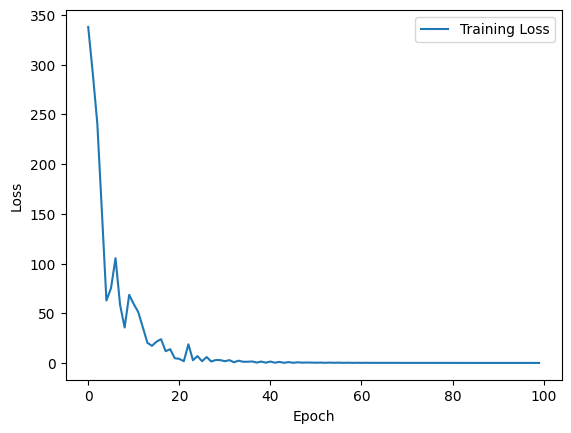

In [ ]:
history = model.fit(X, y, epochs=100, verbose=0)
print("Training complete!")

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Test the Model
Let’s predict what comes after the sequence `[27, 28, 29]` (the last few in our training data) and see if it predicts **30**.


In [ ]:
test_seq = np.array([[27], [28], [29]])
test_seq = test_seq.reshape((1, sequence_length, 1))
prediction = model.predict(test_seq)
print("Predicted next number:", prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
Predicted next number: 29.636183


In [ ]:
#Tried differernt parameters closest i could get is 29.63

## Glossary
- **RNN**: Recurrent Neural Network; processes sequences by iterating through timesteps.
- **LSTM**: Long Short-Term Memory network; a special RNN with gates to remember or forget.
- **Cell State (C)**: The long-term memory that flows through time.
- **Hidden State (h)**: The short-term output from the LSTM cell at each time step.
- **Forget Gate**: Gate that decides what to remove from the cell state.
- **Input Gate**: Gate that decides what to add to the cell state.
- **Output Gate**: Gate that decides what to reveal as the hidden state.
- **Sigmoid ($\sigma$)**: A function that outputs between 0 and 1.
- **Tanh ($\tanh$)**: A function that outputs between -1 and 1.
- **Weights (W)**, **Biases (b)**: Learnable parameters that the network updates via backpropagation.
- **Vanishing Gradient Problem**: When gradients become very small, making it hard to learn long-term dependencies.
- **GRU**: Gated Recurrent Unit, a simpler variant of LSTM.


## Conclusion
You have now:
- Learned the **intuition** behind LSTMs.
- Seen the **mathematical equations**.
- Walked through a **from-scratch** example in NumPy.
- Built a **toy LSTM** model in TensorFlow/Keras.
- Explored **practical usage**, real-world examples, and Q&A.

Feel free to experiment with:
- Different numbers of LSTM units.
- More layers.
- Different optimizers.
- New data.

Keep asking questions and exploring more advanced topics like **attention mechanisms**, **transformers**, and **sequence-to-sequence models**!

In [ ]:
import os, sys, platform, datetime, uuid, socket

def signoff(name="Anonymous"):
    colab_check = "Yes" if 'google.colab' in sys.modules else "No"
    mac_addr = ':'.join(format((uuid.getnode() >> i) & 0xff, '02x') for i in reversed(range(0, 48, 8)))
    print("+++ Acknowledgement +++")
    print(f"Executed on: {datetime.datetime.now()}")
    print(f"In Google Colab: {colab_check}")
    print(f"System info: {platform.system()} {platform.release()}")
    print(f"Node name: {platform.node()}")
    print(f"MAC address: {mac_addr}")
    try:
        print(f"IP address: {socket.gethostbyname(socket.gethostname())}")
    except:
        print("IP address: Unknown")
    print(f"Signing off, {name}")

signoff("Kushal Chandani")

+++ Acknowledgement +++
Executed on: 2025-02-02 16:59:53.795183
In Google Colab: Yes
System info: Linux 6.1.85+
Node name: d4d087cbffc2
MAC address: 02:42:ac:1c:00:0c
IP address: 172.28.0.12
Signing off, Kushal Chandani
